In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from sqlalchemy import create_engine

In [2]:
pop_file_to_load = "Resources/2021_Census_Age_Population.csv"
# load census file to open and view
pop_file_df = pd.read_csv(pop_file_to_load)

In [3]:
pop_df = pd.DataFrame(pop_file_df)

pop_df.head(20)

,Label (Grouping),Illinois!!Estimate,Illinois!!Margin of Error,New York!!Estimate,New York!!Margin of Error,Washington!!Estimate,Washington!!Margin of Error
0,Total:,4991641,"±12,428",7652666,"±17,305",3022255,"±9,423"
1,Householder under 25 years:,179566,"±6,578",201346,"±7,991",119196,"±5,170"
2,"Less than $10,000",31941,"±3,028",36743,"±4,164",16249,"±2,853"
3,"$10,000 to $14,999",12965,"±2,261",11233,"±2,075",4946,"±1,327"
4,"$15,000 to $19,999",12791,"±2,594",10527,"±2,428",5159,"±1,516"
5,"$20,000 to $24,999",11748,"±1,678",10503,"±2,155",7468,"±1,775"
6,"$25,000 to $29,999",10696,"±1,868",9600,"±1,781",5875,"±1,403"
7,"$30,000 to $34,999",12407,"±2,213",10774,"±2,222",6765,"±1,726"
8,"$35,000 to $39,999",8082,"±1,544",10234,"±1,819",5553,"±1,477"
9,"$40,000 to $44,999",7944,"±1,571",10052,"±1,982",5592,"±1,568"


In [4]:
for col in pop_df.columns:
    print(col)

Label (Grouping)
Illinois!!Estimate
Illinois!!Margin of Error
New York!!Estimate
New York!!Margin of Error
Washington!!Estimate
Washington!!Margin of Error


In [5]:
pop_df_max = pd.DataFrame(pop_df.head(1))
pop_df_max = pop_df_max.rename(columns={"Illinois!!Estimate": "Illinois","New York!!Estimate": "New York", "Washington!!Estimate":"Washington"})
pop_df_max

,Label (Grouping),Illinois,Illinois!!Margin of Error,New York,New York!!Margin of Error,Washington,Washington!!Margin of Error
0,Total:,4991641,"±12,428",7652666,"±17,305",3022255,"±9,423"


In [6]:
# Create Pie chart with population distribution
pop_df_max = pop_df_max.loc[:,["Illinois", "New York", "Washington"]]
pop_df_max

,Illinois,New York,Washington
0,4991641,7652666,3022255


In [7]:
population_df = pop_df.set_index(["Label (Grouping)"])
population_df

,Illinois!!Estimate,Illinois!!Margin of Error,New York!!Estimate,New York!!Margin of Error,Washington!!Estimate,Washington!!Margin of Error
Label (Grouping),,,,,,
Total:,4991641,"±12,428",7652666,"±17,305",3022255,"±9,423"
Householder under 25 years:,179566,"±6,578",201346,"±7,991",119196,"±5,170"
"Less than $10,000",31941,"±3,028",36743,"±4,164",16249,"±2,853"
"$10,000 to $14,999",12965,"±2,261",11233,"±2,075",4946,"±1,327"
"$15,000 to $19,999",12791,"±2,594",10527,"±2,428",5159,"±1,516"
...,...,...,...,...,...,...
"$75,000 to $99,999",148486,"±4,800",233056,"±7,178",94625,"±5,010"
"$100,000 to $124,999",101351,"±4,253",155583,"±5,380",64357,"±3,984"
"$125,000 to $149,999",63548,"±3,368",100660,"±4,588",41128,"±3,406"


In [8]:
population_df = population_df.rename(columns={"Illinois!!Estimate": "Illinois","New York!!Estimate": "New York", "Washington!!Estimate":"Washington"})
population_df = population_df.loc[:,["Illinois", "New York", "Washington"]]
population_df

,Illinois,New York,Washington
Label (Grouping),,,
Total:,4991641,7652666,3022255
Householder under 25 years:,179566,201346,119196
"Less than $10,000",31941,36743,16249
"$10,000 to $14,999",12965,11233,4946
"$15,000 to $19,999",12791,10527,5159
...,...,...,...
"$75,000 to $99,999",148486,233056,94625
"$100,000 to $124,999",101351,155583,64357
"$125,000 to $149,999",63548,100660,41128


In [9]:
# Generating total population distribution for 3 states
pop_df_max = pd.DataFrame(population_df.iloc[0]).T
pop_df_max

,Illinois,New York,Washington
Total:,4991641,7652666,3022255


In [10]:
#Generation distribution of under 25
under25 = pd.DataFrame(population_df.iloc[[1]])
under25

,Illinois,New York,Washington
Label (Grouping),,,
Householder under 25 years:,179566,201346,119196


In [11]:
#Generation distribution of under 25-44
age2544 = pd.DataFrame(population_df.iloc[[18]])
age2544

,Illinois,New York,Washington
Label (Grouping),,,
Householder 25 to 44 years:,1671363,2389461,1100204


In [12]:
#Generation distribution of under 25-44
age4564 = pd.DataFrame(population_df.iloc[[35]])
age4564

,Illinois,New York,Washington
Label (Grouping),,,
Householder 45 to 64 years:,1816935,2911618,1045903


In [13]:
#Generation distribution of under 25-44
age65over = pd.DataFrame(population_df.iloc[[52]])
age65over

,Illinois,New York,Washington
Label (Grouping),,,
Householder 65 years and over:,1323777,2150241,756952


In [14]:
# Combine all age distributions
combined_age = pd.concat([under25, age2544, age4564, age65over], ignore_index=False,axis=0)
combined_age

,Illinois,New York,Washington
Label (Grouping),,,
Householder under 25 years:,179566,201346,119196
Householder 25 to 44 years:,1671363,2389461,1100204
Householder 45 to 64 years:,1816935,2911618,1045903
Householder 65 years and over:,1323777,2150241,756952


In [15]:
combined_age.to_csv("combined_age.csv", encoding='utf-8', index=False)

In [16]:
total_arr = pop_df_max.to_numpy()
total_arr

array([[4991641, 7652666, 3022255]], dtype=int64)

In [17]:
# Labels for the sections of our pie chart
labels = ["Illinois", "New York", "Washington"]

# The values of each section of the pie chart
total_arr = [4991641, 7652666, 3022255]

# The colors of each section of the pie chart
colors = ["coral", "blue", "lightgrey"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1, 0)

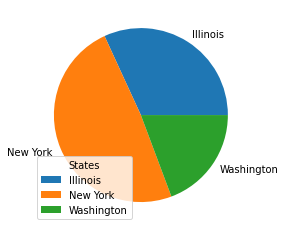

In [18]:
plt.pie(total_arr, labels = labels)
plt.legend(title = "States")
plt.show() 

In [19]:
# Distribution of income for under 25
income25under = pd.DataFrame(population_df.iloc[2:17])
income25under

,Illinois,New York,Washington
Label (Grouping),,,
"Less than $10,000",31941,36743,16249
"$10,000 to $14,999",12965,11233,4946
"$15,000 to $19,999",12791,10527,5159
"$20,000 to $24,999",11748,10503,7468
"$25,000 to $29,999",10696,9600,5875
"$30,000 to $34,999",12407,10774,6765
"$35,000 to $39,999",8082,10234,5553
"$40,000 to $44,999",7944,10052,5592
"$45,000 to $49,999",6596,9073,5009


In [20]:
income25under.describe(include='all')

,Illinois,New York,Washington
count,15.000000,15.000000,15.000000
mean,11804.866667,13066.933333,7703.466667
std,6969.568155,7664.157362,4073.972226
min,3405.000000,5835.000000,2146.000000
25%,7502.000000,9826.000000,5084.000000
50%,11748.000000,10527.000000,5875.000000
75%,13211.000000,12966.500000,9417.500000
max,31941.000000,36743.000000,16249.000000


In [21]:
income25under.to_csv("income25under.csv", encoding='utf-8', index=False)

In [22]:
# Distribution of income for under 26 - 44
income2644 = pd.DataFrame(population_df.iloc[19:34])
income2644

,Illinois,New York,Washington
Label (Grouping),,,
"Less than $10,000",89818,147025,41533
"$10,000 to $14,999",36649,56225,17877
"$15,000 to $19,999",37356,56000,17899
"$20,000 to $24,999",46088,61749,18846
"$25,000 to $29,999",45419,70841,23368
"$30,000 to $34,999",58709,74682,26642
"$35,000 to $39,999",55783,70297,31066
"$40,000 to $44,999",60998,84524,36529
"$45,000 to $49,999",58294,67108,27237


In [24]:
income2644.to_csv("income2644.csv", encoding='utf-8', index=False)

In [25]:
income2644.astype(float).describe(include='all')

,Illinois,New York,Washington
count,15.000000,15.000000,15.000000
mean,99762.266667,136306.866667,61270.400000
std,65495.951584,85917.116074,47657.172044
min,36649.000000,56000.000000,17877.000000
25%,50935.500000,68702.500000,25005.000000
50%,60998.000000,84524.000000,36529.000000
75%,137894.500000,200157.000000,97938.500000
max,246279.000000,315977.000000,153078.000000


In [26]:
# Distribution of income for under 45-65
income4564 = pd.DataFrame(population_df.iloc[36:51])
income4564

,Illinois,New York,Washington
Label (Grouping),,,
"Less than $10,000",108990,186127,47968
"$10,000 to $14,999",46985,106671,24248
"$15,000 to $19,999",47938,82457,21333
"$20,000 to $24,999",45992,82942,22542
"$25,000 to $29,999",48263,76252,22899
"$30,000 to $34,999",56475,90610,24193
"$35,000 to $39,999",53131,75860,25204
"$40,000 to $44,999",52427,82985,30872
"$45,000 to $49,999",54419,82025,26202


In [27]:
income4564.astype(float).describe(include='all')

,Illinois,New York,Washington
count,15.000000,15.000000,15.000000
mean,104152.800000,162224.066667,57105.066667
std,66323.115054,96410.684620,42464.159722
min,45992.000000,75860.000000,21333.000000
25%,50345.000000,82699.500000,24220.500000
50%,56475.000000,106671.000000,30872.000000
75%,158750.000000,229691.000000,88493.000000
max,229223.000000,348257.000000,130262.000000


In [28]:
income4564.to_csv("income4564.csv", encoding='utf-8', index=False)

In [29]:
# Distribution of income for under 45-65
income65plus = pd.DataFrame(population_df.iloc[53:68])
income65plus

,Illinois,New York,Washington
Label (Grouping),,,
"Less than $10,000",91179,165111,39805
"$10,000 to $14,999",74363,153081,37993
"$15,000 to $19,999",79055,132503,36154
"$20,000 to $24,999",83360,120067,34527
"$25,000 to $29,999",72190,104994,36834
"$30,000 to $34,999",66886,97969,33992
"$35,000 to $39,999",64085,91184,37062
"$40,000 to $44,999",58961,86488,36291
"$45,000 to $49,999",55466,77750,31831


In [ ]:
income65plus.astype(float).describe(include='all')

We need to include a box plot that shows the distribution of income amongst all age groups in all three cities in one plot then visually point out where the avg is.